In [41]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### df -> describe -> boxplot, hist -> issue, 관계를 찾아내라
### cor -> heatmap
### data간의 분포도 -> scatterplot

### df에서 info(), describe()를 이용해서 전반적인 데이터의 분포를 파악한 후에는 boxplot과 hist, scatterplot을 이용해서 이슈를 찾아내고 숨어있는 패턴을 파악해라.
### 또한 corr와 heatmap을 해서 예상과 다른 수치가 발견되면 그 원인이 무엇인지 df의 범위를 변경해가면서 파악해본다.

### 결측치 : 키보드로 입력된 값중 컴퓨터가 모르는 값으로 머신러닝, 딥러닝에서 에러의 가장 큰 요인이 된다.
###	1.삭제, 2.대체(평균,중앙값, 최빈값등), 3.임의값으로 대체, 4. 미래예측값으로 대체

### histogram : df.hist(column, figsize, color, bins, range)
### boxplot : df.boxplot(column, by, figsize)
### density : df.column.plot(kind='density', figsize, xlim)
### barplot : ctb = pd.crosstab(index=df.col1, columns='count') ---> ctb.plot(kind='bar', stacked, figsize)
### scatter : df.plot(kind='scatter', x, y, s[=col], c=[col], figsize, ylim)
### line : time_df.plot(x='year', y, figsize)
### heatmap : df_corr = df.corr() --> sns.heatmap(df_corr, annot=True)

### my_plot = time_df.plot(x='year', y, figsize) --> my_fig = my_plot.get_figure() --> my_fig.savefig("Line_plot.png)

In [44]:
df = sns.load_dataset('tips')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [45]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df.corr().round(2)

,total_bill,tip,size
total_bill,1.00,0.68,0.60
tip,0.68,1.00,0.49
size,0.60,0.49,1.00


<AxesSubplot:>

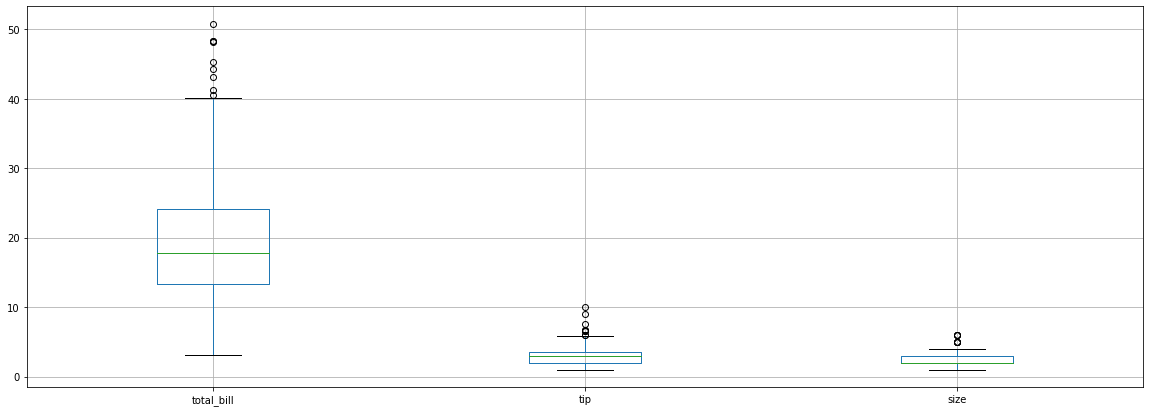

In [10]:
df.boxplot(figsize=(20,7))

<AxesSubplot:>

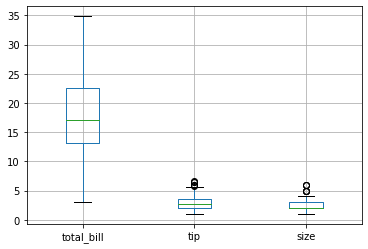

In [13]:
temp = df[df.total_bill <= 35]
temp.boxplot()

In [15]:
temp.corr().round(2)

,total_bill,tip,size
total_bill,1.00,0.62,0.56
tip,0.62,1.00,0.45
size,0.56,0.45,1.00


In [20]:
chr(16)

'\x10'

In [22]:
chr(65), chr(97)

('A', 'a')

In [23]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<AxesSubplot:>

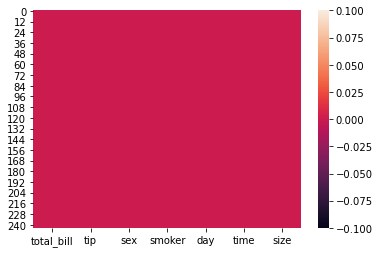

In [24]:
sns.heatmap(df.isna())

In [38]:
tmp = df
tmp = df.replace(2, np.NaN)

tmp.corr()

,total_bill,tip,size
total_bill,1.000000,0.683084,0.489236
tip,0.683084,1.000000,0.445233
size,0.489236,0.445233,1.000000


In [39]:
tmp.isna().sum()

total_bill      0
tip            33
sex             0
smoker          0
day             0
time            0
size          156
dtype: int64

<AxesSubplot:>

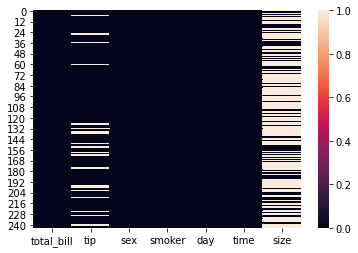

In [40]:
sns.heatmap(tmp.isna())

In [47]:
cat_cols = ['sex', 'smoker','day','time']
df[cat_cols].describe()

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


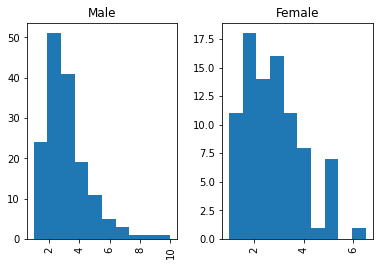

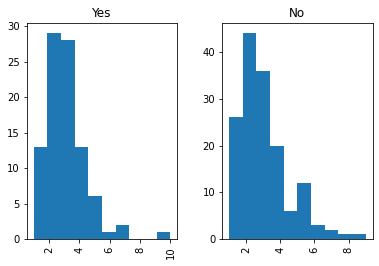

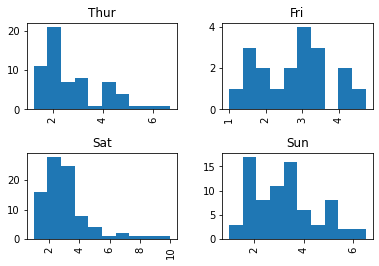

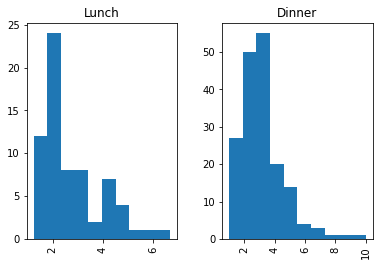

In [51]:
for cat in cat_cols:
    df.hist(column='tip', by=cat)
plt.show()

In [52]:
a = np.array([[1,2,3],[5,6,7]])
w = [[[10]],[[20]],[[10]],[[50]]]

a * w

array([[[ 10,  20,  30],
        [ 50,  60,  70]],

       [[ 20,  40,  60],
        [100, 120, 140]],

       [[ 10,  20,  30],
        [ 50,  60,  70]],

       [[ 50, 100, 150],
        [250, 300, 350]]])

In [53]:
def barplot2(var1, var2):
    ax = sns.barplot(x=var1, y='tip', hue=var2, data=df)

<AxesSubplot:xlabel='day', ylabel='tip'>

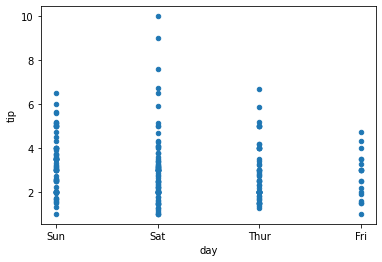

In [56]:
df.plot(kind='scatter', x='day', y='tip')

In [65]:
pd.get_dummies(df,columns=['sex','time'], prefix='')

,total_bill,tip,smoker,day,size,_Male,_Female,_Lunch,_Dinner
0,16.99,1.01,No,Sun,2,0,1,0,1
1,10.34,1.66,No,Sun,3,1,0,0,1
2,21.01,3.50,No,Sun,3,1,0,0,1
3,23.68,3.31,No,Sun,2,1,0,0,1
4,24.59,3.61,No,Sun,4,0,1,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,3,1,0,0,1
240,27.18,2.00,Yes,Sat,2,0,1,0,1
241,22.67,2.00,Yes,Sat,2,1,0,0,1
242,17.82,1.75,No,Sat,2,1,0,0,1


In [58]:
df.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [66]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [74]:
le = LabelEncoder()
le_vals = le.fit_transform(df.day)
le_vals

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [80]:
ohe = OneHotEncoder()
X = ohe.fit_transform(le_vals.reshape(-1,1)).todense()
X[:5]

matrix([[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]])